In [12]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier  #분류
from sklearn.neighbors import KNeighborsRegressor  #예측

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= 10  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [18]:
#numpy
perch_length=np.array(
     [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight=np.array(
     [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

In [43]:
# 머신러닝 구현
# 1. 데이터 전처리 - Nan,0,단위처리, 훈련세트,테스트세트 분리
train_input,test_input,train_target,test_target = train_test_split(
    perch_length,perch_weight
)
train_input

array([27.5, 40. , 22. , 21. , 24. , 36. , 22. , 20. , 21.3, 28. , 18.7,
       22.7, 40. , 40. , 22. , 36.5, 16.2, 22.5, 25.6, 22. , 40. , 44. ,
       25. , 32.8, 13.7, 43. , 43.5, 23.5, 22. , 37. , 30. , 21. , 24. ,
       39. , 39. , 24.6, 18. , 22.5, 19. , 42. , 26.5, 27.5])

Text(0, 0.5, '무게')

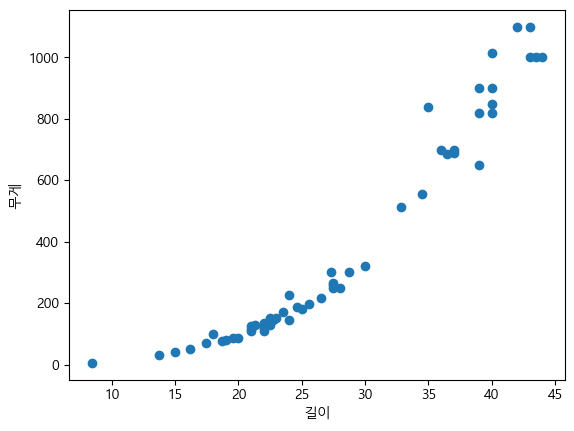

In [19]:
plt.scatter(df[0],df[1])
plt.xlabel('길이')
plt.ylabel('무게')

In [23]:
train_input.shape
test_input.shape

(14,)

In [38]:
#array reshape

arr1 =np.array([1,2,3,4,5,6])
arr1=arr1.reshape(-1,1)
arr1
#arr1=arr1.reshape(2,2): array([[1, 2],[3, 4]])
# arr1=arr1.reshape(2,3) : array([[1, 2, 3],[4, 5, 6]])
#arr1=arr1.reshape(6,1) : array([[1],[2],[3],[4],[5],[6]])

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [39]:
#[1,2,3,4]
#[[1],[2],[3],[4]]
arr1=np.array([1,2,3,4])
arr1=arr1.reshape(-1,1)
arr1

array([[1],
       [2],
       [3],
       [4]])

In [44]:
#알고리즘 구현을 위한 2차원 행렬로 변경.
train_input= train_input.reshape(-1,1)
test_input= test_input.reshape(-1,1)

In [46]:
#데이터 학습시키기
knr=KNeighborsRegressor()
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [47]:
score=knr.score(test_input,test_target)
score

0.9664290857555502

In [48]:
#예측의 오차범위-평균 절대값 오차
from sklearn.metrics import mean_absolute_error
predict = knr.predict(test_input)
#무게 예측
print("예측값: ",predict)

예측값:  [  68.3 1043.   262.6  647.8   78.9  238.    68.3  841.   143.    95.6
  709.   581.8  124.   238. ]


In [49]:
#예측한 값과 실제값의 평균 절대값 오차
test_mean = mean_absolute_error(test_target,predict)
print("오차범위: ",test_mean)

오차범위:  40.47142857142857


과대적합과 과소적합


In [52]:
#예측률 측정하기 
score=knr.score(test_input,test_target)
print("예측률: ",score)

예측률:  0.9664290857555502


In [51]:
#실제 train 데이터의 예측률은 어느정도 나오는지 확인
score2=knr.score(train_input,train_target)
print("train예측률: ",score2)


train예측률:  0.9810184827558062


In [56]:
#이웃의 개수를 축소 : 5 ->3 
#과소적합은 n_neighbors 를 줄임.
#과대적합은 n_neighbors 를 늘림.
knr.n_neighbors=3
# 데이터 훈련 다시 시키기
knr.fit(train_input,train_target)
# train 데이터 예측
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9881261216067543
0.969594058772252


In [54]:
knr.score(test_input,test_target)

0.969594058772252

In [57]:
arr=[[i] for i  in range(5,45+1)]   # X축의 좌표
arr

[[5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45]]

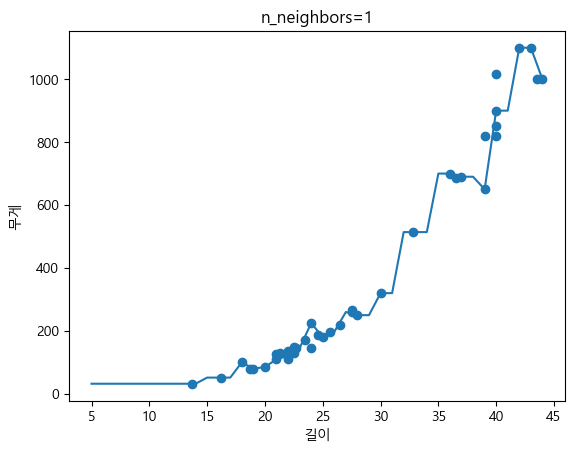

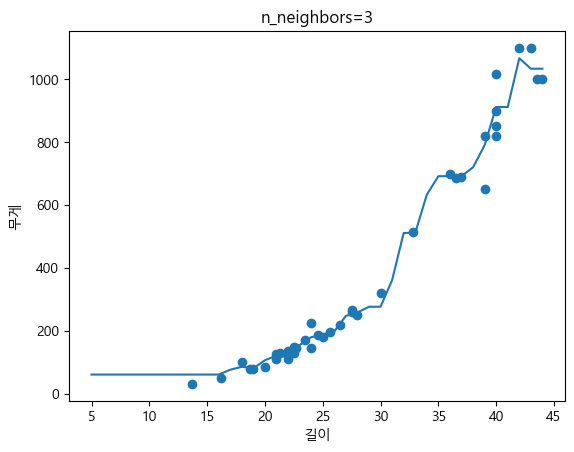

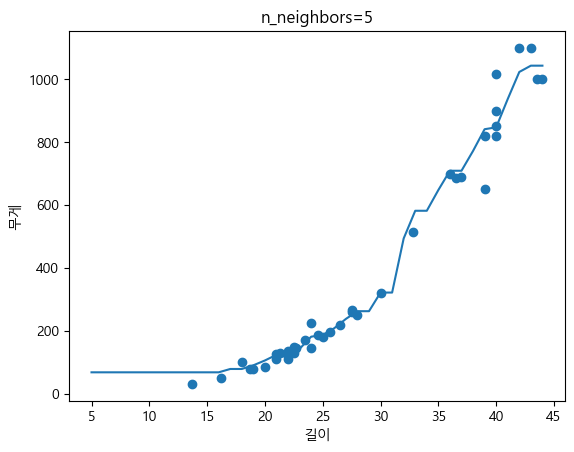

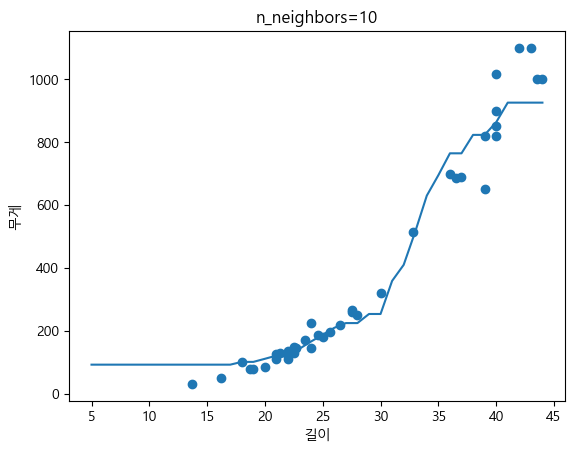

In [65]:
knr=KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)  #5,6,7,,,,,45
for n in [1,3,5,10]: # n_neighbors = 1,5,10 예측률을 그래프로 표시

    knr.n_neighbors=n
    # 데이터 훈련 다시 시키기
    knr.fit(train_input,train_target)
   
    # 배열로 만든 길이를 가지고 예측무게 산출 
    predict = knr.predict(x)
    #훈련세트의 값을 먼저 출력
    plt.scatter(train_input, train_target) 
    plt.plot(x,predict)
    plt.title('n_neighbors={}'.format(n))
    plt.xlabel('길이')
    plt.ylabel('무게')
    plt.show()

0의 데이터 있는지, 직선의 모양이 어떤지를 확인

In [ ]:
#데이터 전처리 - train,test세트 구성
#random_state =42 랜덤으로 섞는 것을 고정시켜서, 예측률이 고정됨.
train_input, test_input, train_target, test_target=train_test_split(
    perch_length,perch_weight,random_state =42
)

In [ ]:
#train_input - 2가지 이상의 데이터 행렬로 구성, 2차원 행렬로 구성


In [67]:
#1차원 train_input, test_input ->2차원의 행렬로 변경
#2개 이상의 특성값을 가지면 2차원 행렬이 되어 reshape할 필요가 없음.
train_input = train_input.reshape(-1,1)
train_input.shape
test_input = test_input.reshape(-1,1)

In [68]:
#데이터 훈련 시키기
knr = KNeighborsRegressor()   #knn 회귀- 예측 알고리즘을 사용
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [77]:
predict = knr.predict(test_input)
print("예측 값: ",predict)

예측 값:  [  68.3 1043.   262.6  647.8   78.9  238.    68.3  841.   143.    95.6
  709.   581.8  124.   238. ]


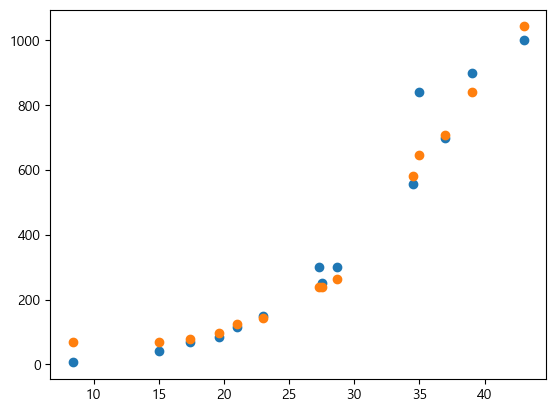

In [87]:
plt.scatter(test_input,test_target)   #파란색 실제값
plt.scatter(test_input,predict)       # 주황색 예측값

In [88]:
#train 예측률
score = knr.score(train_input,train_target)
print("train예측룰: ",score)

#test 예측률 구하기
score=knr.score(test_input, test_target)
print("test 예측률: ", score)


train예측룰:  0.9810184827558062
test 예측률:  0.9664290857555502


In [89]:
#과소적합이 되었다고 판단되면 n_neighbor
knr.n_neighbors=3   #5개에서 3개로 줄임
knr.fit(train_input,train_target)


KNeighborsRegressor(n_neighbors=3)

In [90]:
#train 예측률
score = knr.score(train_input,train_target)
print("train예측룰: ",score)

#test 예측률 구하기
score=knr.score(test_input, test_target)
print("test 예측률: ", score)

train예측룰:  0.9881261216067543
test 예측률:  0.969594058772252


In [95]:
predict = knr.predict([[16.8]])
print(predict)

[76.5]


In [98]:
#5부터 5의 배수로 45까지 해서 
#5,10,15,20,25,30,35,40,45 길이를 예측해서
#선그래프로 출력
#train_input,trin_target 데이터를 scatter로 출력

 
arr=[[i] for i  in range(5,45+1,5)] 
arr

[[5], [10], [15], [20], [25], [30], [35], [40], [45]]

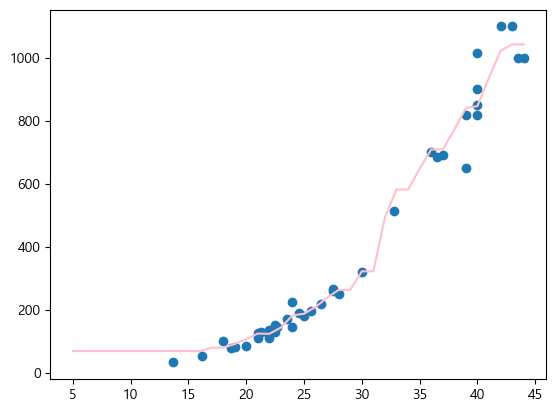

In [104]:
knr.n_neighbors = 3
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)
predict=knr.predict(x)
plt.scatter(train_input,train_target)
plt.plot(x,predict,color='pink')

In [ ]:
knr=KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)  #5,6,7,,,,,45
for n in [1,3,5,10]: # n_neighbors = 1,5,10 예측률을 그래프로 표시

    knr.n_neighbors=n
    # 데이터 훈련 다시 시키기
    knr.fit(train_input,train_target)
   
    # 배열로 만든 길이를 가지고 예측무게 산출 
    predict = knr.predict(x)
    #훈련세트의 값을 먼저 출력
    plt.scatter(train_input, train_target) 
    plt.plot(x,predict)
    plt.title('n_neighbors={}'.format(n))
    plt.xlabel('길이')
    plt.ylabel('무게')
    plt.show()

In [58]:
np.arange(4,45)

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44])

In [59]:
np.arange(5,45).reshape(-1,1)

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44]])

In [22]:

train_input,test_input,train_target,test_target = train_test_split(
    df[0],df[1]
)
train_input

28    25.6
35    28.7
48    40.0
13    21.3
17    22.0
5     18.0
55    44.0
41    36.0
11    21.0
4     17.4
54    43.5
43    37.0
6     18.7
53    43.0
14    22.0
1     13.7
3     16.2
8     19.6
45    39.0
33    27.5
31    27.5
42    37.0
2     15.0
30    27.3
36    30.0
15    22.0
40    36.5
29    26.5
18    22.0
10    21.0
32    27.5
50    40.0
24    24.0
19    22.5
46    39.0
34    28.0
51    42.0
52    43.0
37    32.8
7     19.0
47    40.0
26    24.6
Name: 0, dtype: float64

In [ ]:
perch_length=[8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]

perch_weight=[5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]

df = pd.DataFrame([perch_length,perch_weight])
df =df.T
df

Text(0, 0.5, '무게')

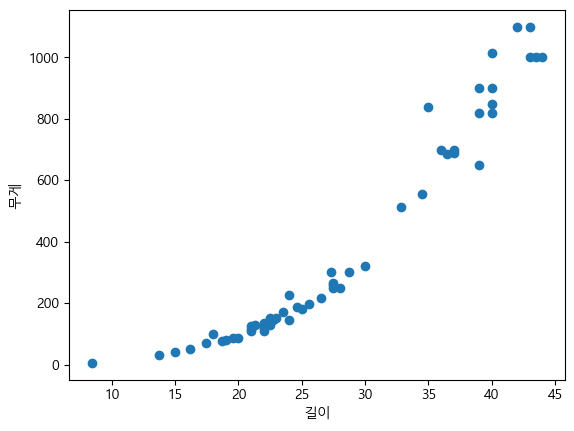

In [7]:
#산점도로 출력하시오.
# x축은 길이 df[0], y축은 무게 df[1]
df[1]
plt.scatter(df[0],df[1])
plt.xlabel('길이')
plt.ylabel('무게')

In [8]:
df.info()   # 56 non-null  null값없음. 0값있는지없는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       56 non-null     float64
 1   1       56 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


#머신러닝 구현
#1.데이터 전처리 -Nan,0,단위처리,훈련세트,테스트세트 분리

In [9]:

train_input,test_input,train_target,test_target = train_test_split(
    df[0],df[1]
)
train_input
#랜덤으로 섞여서 출력


0      8.4
19    22.5
49    40.0
47    40.0
50    40.0
27    25.0
41    36.0
16    22.0
30    27.3
3     16.2
21    22.7
25    24.0
9     20.0
15    22.0
39    35.0
20    22.5
42    37.0
55    44.0
14    22.0
37    32.8
12    21.0
26    24.6
2     15.0
4     17.4
6     18.7
35    28.7
44    39.0
36    30.0
32    27.5
43    37.0
54    43.5
24    24.0
48    40.0
51    42.0
5     18.0
28    25.6
45    39.0
38    34.5
13    21.3
46    39.0
7     19.0
1     13.7
Name: 0, dtype: float64

In [11]:
# 총개수: 56

train_input.shape    #42
# test_input.shape   #14

(42,)

#2.데이터 학습시키기


In [13]:
knr=KNeighborsRegressor()
knr.fit(train_input)

TypeError: KNeighborsRegressor.fit() missing 1 required positional argument: 'y'

#3.데이터 예측하기
#4.예측값 구하기